# Harmonograph

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

resol = 0.01
amp = 100
step = 1000

## Unison (1:1)

In [2]:
def make_harmonograph(fx, fy, px, py):
    t = np.arange(0,step*resol,resol)
    x = amp * np.sin(2*np.pi * fx * t + px)
    y = amp * np.sin(2*np.pi * fy * t + py)

    plt.axis([-amp*1.6, amp*1.6, -amp*1.2, amp*1.2])
    plt.axis('off')
    plt.plot(x,y)
    plt.plot(x[0], y[0], 'ro')

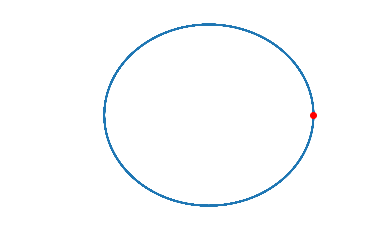

In [3]:
make_harmonograph(fx = 1, fy = 1, px = np.pi/2, py = 0)
plt.show()

## Near Unison (1:0.99)

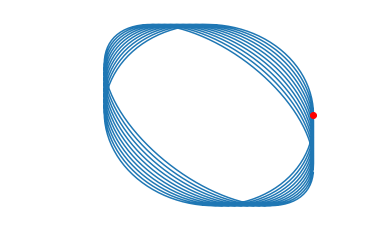

In [4]:
make_harmonograph(fx = 1, fy = 0.99, px = np.pi/2, py = 0)
plt.show()

## Octave (2:1)

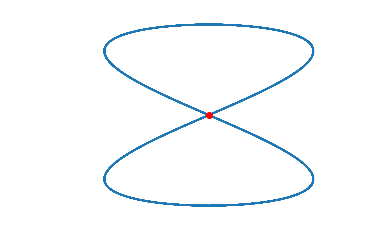

In [5]:
make_harmonograph(fx = 2, fy = 1, px = 0, py = 0)
plt.show()

## Fifth (3:2)

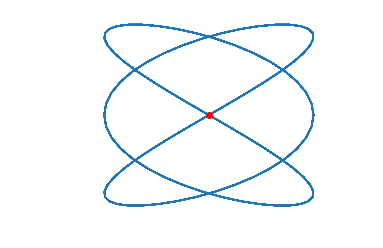

In [6]:
make_harmonograph(fx = 3, fy = 2, px = 0, py = 0)
plt.show()

## Fourth (4:3)

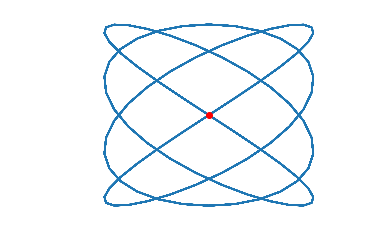

In [7]:
make_harmonograph(fx = 4, fy = 3, px = 0, py = 0)
plt.show()

## Amination

In [23]:
fx = 1
fy = 1
px = np.pi/2
py = 0

In [24]:
%%capture
from matplotlib import animation, rc
from IPython.display import HTML, Image

rc('animation', html='html5')

cycle = 4
f = min(fx,fy)
lengthtime = cycle * 1/f
delay = 0.01
frame_num = round(lengthtime/delay)

qx = 2 * np.pi * fx * delay
qy = 2 * np.pi * fy * delay

fig, ax = plt.subplots()
ax.set_xlim((-amp*1.6, amp*1.6))
ax.set_ylim((-amp*1.6, amp*1.6))
line, = ax.plot([], [], 'o')

def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    x = amp * np.sin(qx*i + px)
    y = amp * np.sin(qy*i + py)
    dx = [x, amp*1.2, x]
    dy = [-amp*1.2, y, y]
    line.set_data(dx, dy)
    return (line,)


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame_num, interval=delay*1000, blit=True)

In [25]:
HTML(anim.to_jshtml())